In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [133]:
# Import data
df = pd.read_csv('medical_examination.csv')


In [134]:
# Add 'overweight' column To determine if a person is overweight, first calculate 
# their BMI by dividing their weight in kilograms by the square of their height in 
# meters. If that value is > 25 then the person is overweight. Use the value 0 for 
# NOT overweight and the value 1 for overweight.
df['overweight'] = np.where((df['weight']) / ((df['height'] / 100) ** 2) > 25, 1, 0)



In [135]:
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)


In [153]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat.value_counts()


cardio  variable     value
1       alco         0        33156
0       alco         0        33080
1       smoke        0        32050
0       smoke        0        31781
        gluc         0        30894
        cholesterol  0        29330
        active       1        28643
1       gluc         0        28585
        active       1        27618
        overweight   1        24440
        cholesterol  0        23055
0       overweight   1        19106
                     0        15915
1       cholesterol  1        11924
        overweight   0        10539
        active       0         7361
        gluc         1         6394
0       active       0         6378
        cholesterol  1         5691
        gluc         1         4127
        smoke        1         3240
1       smoke        1         2929
0       alco         1         1941
1       alco         1         1823
dtype: int64

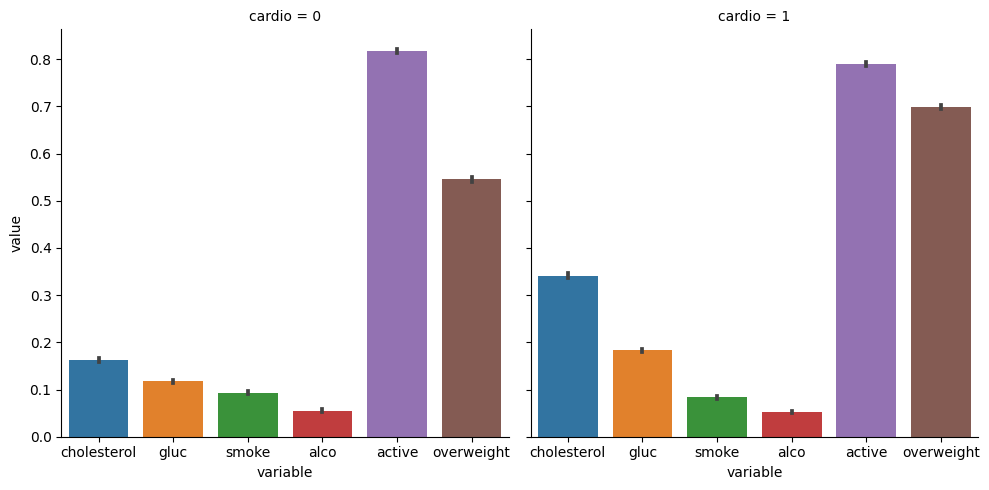

In [145]:
sns.catplot(x='variable', y='value', col='cardio', data=df_cat, kind='bar')